In [27]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library

import re
import typing


In [5]:
df = pd.read_csv('virus_hw2.csv')


In [6]:
df.head()

,PatientID,Address,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,0,8520 Dougherty Common Apt. 318\nLake Annamouth...,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,1,"9338 Griffin Route\nThorntonshire, WY 36917",NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,2,"8350 Adam Streets\nLake Angelaberg, MS 13029",NaN,270.970619,562.336350,1151.389973,NaN,NaN,NaN,NaN,...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk
3,3,"1439 Mason Spring Suite 287\nWest Marissa, VT ...",3.0,485.443587,NaN,949.958138,125.602363,NaN,NaN,31.214112,...,2.612904,0.322986,-1.463554,0.366601,NaN,0.398144,-1.100643,1.162578,NaN,covid_Spreader_NotatRisk
4,4,"621 Johnny Plain Apt. 687\nAmyton, MA 61425",2.0,757.334792,1517.726855,NaN,NaN,NaN,NaN,31.032410,...,0.506867,-1.406444,NaN,1.546139,0.217398,0.501794,1.669463,0.498309,-2634.725478,covid_Spreader_NotatRisk


In [7]:
df.drop(columns=['PatientID', 'Address'])

,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,BloodType,CurrentLocation,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,NaN,NaN,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,NaN,"(Decimal('68.4111015'), Decimal('-120.794703'))",...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,NaN,270.970619,562.336350,1151.389973,NaN,NaN,NaN,NaN,NaN,"(Decimal('-27.055268'), Decimal('-45.220383'))",...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk
3,3.0,485.443587,NaN,949.958138,125.602363,NaN,NaN,31.214112,AB+,"(Decimal('66.539494'), Decimal('10.495389'))",...,2.612904,0.322986,-1.463554,0.366601,NaN,0.398144,-1.100643,1.162578,NaN,covid_Spreader_NotatRisk
4,2.0,757.334792,1517.726855,NaN,NaN,NaN,NaN,31.032410,O+,"(Decimal('-43.228750'), Decimal('14.144745'))",...,0.506867,-1.406444,NaN,1.546139,0.217398,0.501794,1.669463,0.498309,-2634.725478,covid_Spreader_NotatRisk
5,3.0,683.970293,1382.886580,546.525870,NaN,NaN,NaN,31.188945,A-,"(Decimal('64.7080195'), Decimal('4.581880'))",...,1.190291,0.033276,-1.018127,NaN,-0.602338,NaN,-0.339152,NaN,-0.327741,flue_Spreader_atRisk
6,3.0,266.522969,556.768471,NaN,NaN,NaN,NaN,NaN,O+,NaN,...,1.134836,-0.328752,-0.539993,1.000227,0.206121,-1.091816,-1.227989,-1.844853,-0.838332,covid_NotSpreader_atRisk
7,NaN,365.918734,NaN,1152.419923,84.186382,NaN,NaN,NaN,B+,"(Decimal('-83.2593835'), Decimal('171.015674'))",...,2.607946,0.957410,-1.899584,-0.119899,0.022994,NaN,NaN,-0.881802,1.379979,not_detected_Spreader_atRisk
8,NaN,NaN,1707.612827,1158.514542,64.697469,NaN,NaN,29.089820,B+,"(Decimal('31.0664705'), Decimal('15.264753'))",...,1.014724,0.485880,NaN,NaN,-0.817978,-1.020924,NaN,-1.751272,0.997292,not_detected_Spreader_NotatRisk
9,6.0,699.158842,1385.877845,1355.093533,NaN,NaN,NaN,32.077841,NaN,"(Decimal('26.8546335'), Decimal('-60.182060'))",...,NaN,0.137833,NaN,NaN,-0.551349,NaN,-0.849444,0.287530,2.933652,cold_NotSpreader_atRisk


In [37]:
x=df.CurrentLocation
x=x.dropna()
li = x.tolist()
li

["(Decimal('68.4111015'), Decimal('-120.794703'))",
 "(Decimal('-27.055268'), Decimal('-45.220383'))",
 "(Decimal('66.539494'), Decimal('10.495389'))",
 "(Decimal('-43.228750'), Decimal('14.144745'))",
 "(Decimal('64.7080195'), Decimal('4.581880'))",
 "(Decimal('-83.2593835'), Decimal('171.015674'))",
 "(Decimal('31.0664705'), Decimal('15.264753'))",
 "(Decimal('26.8546335'), Decimal('-60.182060'))",
 "(Decimal('-14.515536'), Decimal('93.192097'))",
 "(Decimal('-68.2448015'), Decimal('-15.845895'))",
 "(Decimal('57.332923'), Decimal('-86.264352'))",
 "(Decimal('-12.6708935'), Decimal('132.643685'))",
 "(Decimal('-24.9525375'), Decimal('122.370789'))",
 "(Decimal('42.341041'), Decimal('-74.552083'))",
 "(Decimal('84.534998'), Decimal('-95.905857'))",
 "(Decimal('64.170573'), Decimal('-96.505211'))",
 "(Decimal('29.534756'), Decimal('-179.809686'))",
 "(Decimal('-59.5698445'), Decimal('-177.510348'))",
 "(Decimal('46.973038'), Decimal('118.868537'))",
 "(Decimal('-28.685709'), Decimal('3

In [50]:
reg='-?\d+\.?\d*'
match="(Decimal('21.434580'), Decimal('-103.928014'))"
re.findall(reg, match)

['21.434580', '-103.928014']

In [58]:
regex = '-?\d+\.?\d*'           

loc = [ [ re.findall(regex, match)[0], re.findall(regex, match)[1]]
                                                for match in li ]


for item in loc:
    item[0]=float(item[0])
    item[1]=float(item[1])
    
locx = np.array([match[0] for match in loc])
locy = np.array([match[1] for match in loc])
locx

array([ 68.4111015, -27.055268 ,  66.539494 , ...,  55.2329105,
       -68.6266485,  67.0047005])

In [59]:
# Fixing random state for reproducibility
#np.random.seed(19680801)

# some random data
#x = np.random.randn(1000)
#y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

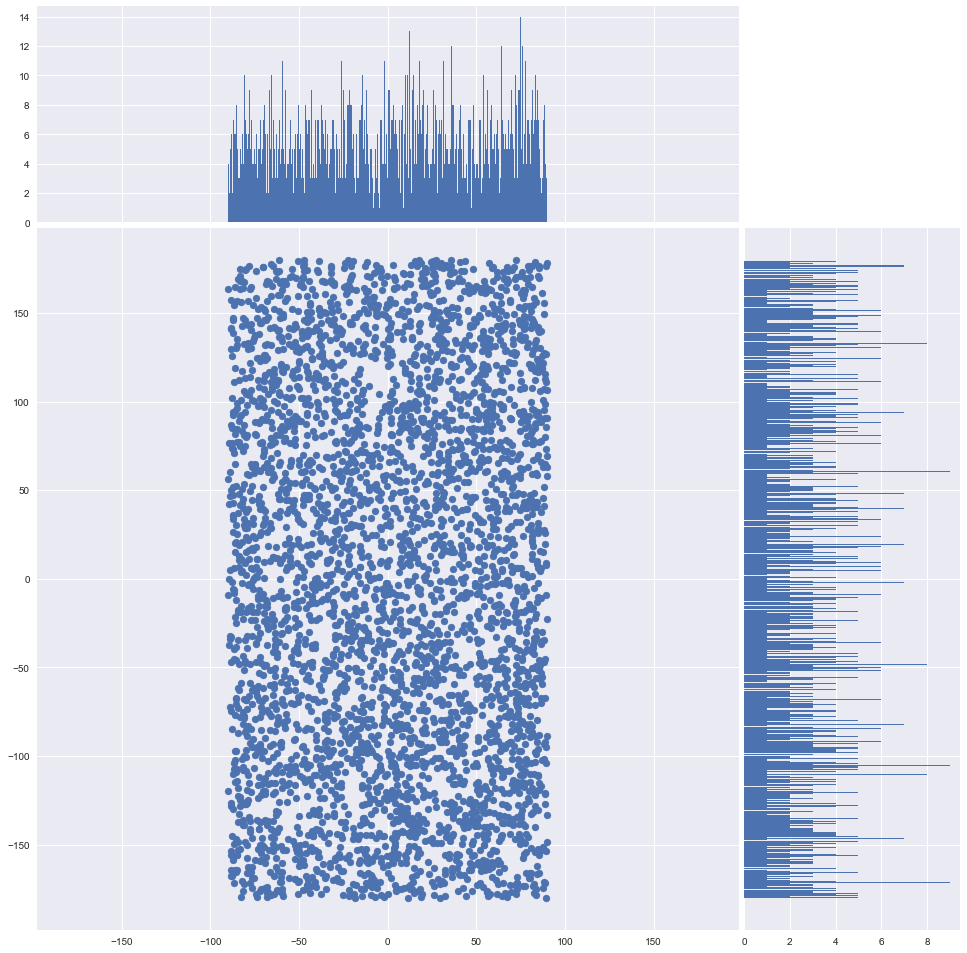

In [66]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(15, 15))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(locx, locy, ax, ax_histx, ax_histy)

plt.show()

In [68]:
print("variance is {}".format(locx.var()))
print("mean is {}".format(locx.mean()))
print("meadian is {}".format(np.median(locx)))

variance is 2743.74670526457
mean is 1.6057599717423494
meadian is 2.8427845


1.6057599717423494

2.8427845